<a href="https://colab.research.google.com/github/navas604/Text-Mining-Image-Recognition/blob/main/HDT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidad Galileo**
## **Maestría en Data Science**
## **Text Mining & Image Recognition**
## **Antonio Everardo Navas Contreras, 14003163**
## **01/08/2021**

---

## **HOJA DE TRABAJO 2**

---

### CARGAR LIBRERIAS

In [1]:
# Importar las librerías que se utilizarán

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Función para escribir la imagen en disco y la lee de vuelta para poderla desplegar

def write_and_show(strImg, arrImg):
  cv2.imwrite(strImg, arrImg)
  imgTemp = cv2.imread(strImg)
  imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
  plt.imshow(imgTemp)

## EJERCICIO 1

In [3]:
# Función para hacer binarización de una imagen

def image_binary(image):
  # Imagen en escala de grises
  image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  
  # Imagen binaria
  ret, binary = cv2.threshold(image_gray, 0, 255, cv2.THRESH_TRIANGLE)

  write_and_show("Image_binary.jpg", binary)

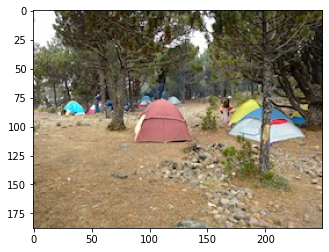

In [4]:
# Cargar y mostrar imagen

img = cv2.imread("IMG_20170107.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

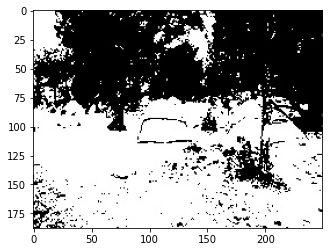

In [5]:
image_binary(img)

## EJERCICIO 2

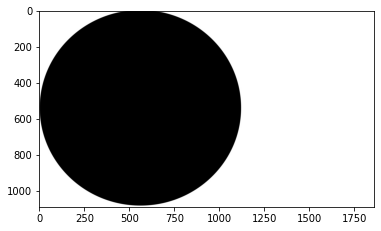

In [6]:
# Cargar y mostrar imagen

img1 = cv2.imread("Picture1.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

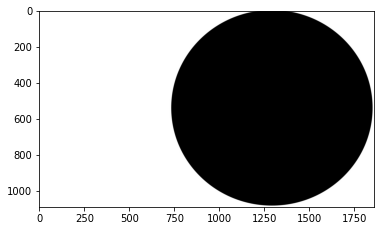

In [7]:
# Cargar y mostrar imagen

img2 = cv2.imread("Picture2.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

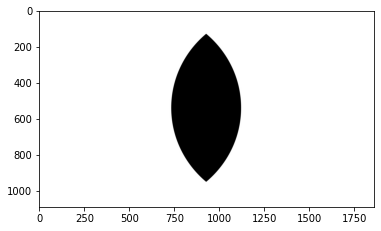

In [8]:
# SUMA

img_ADD = cv2.add(img1, img2)
img_ADD = cv2.cvtColor(img_ADD, cv2.COLOR_BGR2RGB)
plt.imshow(img_ADD)

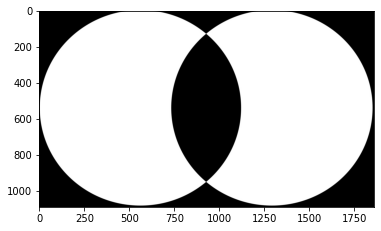

In [9]:
# RESTA

img_DIFF = cv2.absdiff(img1, img2)
img_DIFF = cv2.cvtColor(img_DIFF, cv2.COLOR_BGR2RGB)
plt.imshow(img_DIFF)

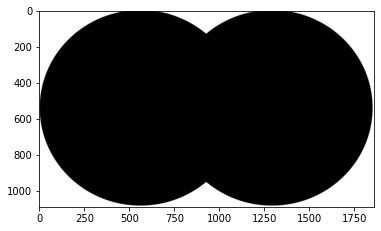

In [10]:
# AND

img_AND = cv2.bitwise_and(img1, img2)
img_AND = cv2.cvtColor(img_AND, cv2.COLOR_BGR2RGB)
plt.imshow(img_AND)

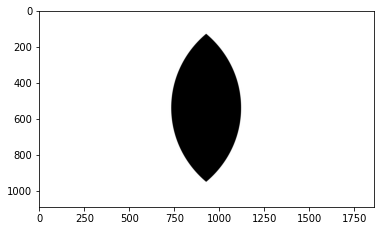

In [11]:
# OR

img_OR = cv2.bitwise_or(img1, img2)
img_OR = cv2.cvtColor(img_OR, cv2.COLOR_BGR2RGB)
plt.imshow(img_OR)

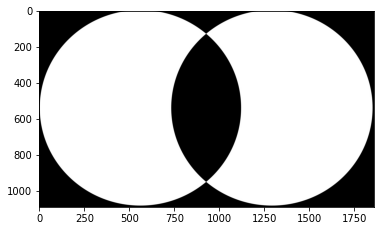

In [12]:
# XOR

img_XOR = cv2.bitwise_xor(img1, img2)
img_XOR = cv2.cvtColor(img_XOR, cv2.COLOR_BGR2RGB)
plt.imshow(img_XOR)

## EJERCICIO 3

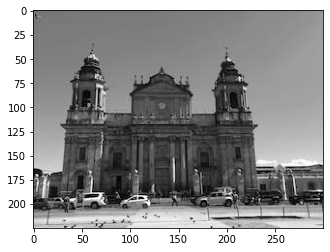

In [13]:
# Cargar y mostrar imagen

img = cv2.imread("IMG_7793.JPG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [14]:
# Función para mostrar una imagen en escala de grises 3 dimensiones
# X y Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel

def image_gray_to_3D(image):
  x, y = np.mgrid[0:image.shape[0], 0:image.shape[1]]

  fig = plt.figure()
  image_3D = fig.gca(projection='3d')
  image_3D.plot_surface(x, y, image, cmap=plt.cm.gray)

  plt.show()

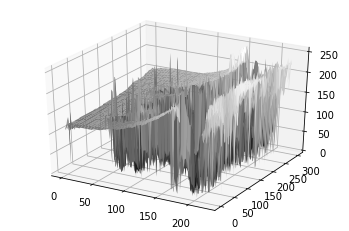

In [15]:
image_gray_to_3D(img)

## EJERCICIO 4

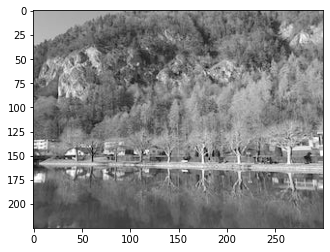

In [16]:
# Cargar y mostrar imagen

img = cv2.imread("IMG_7795.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [17]:
# Función para crear transformaciones de la imagen. 'NEGATIVA', 'LINEAL', 'LOGARITMICA', 'EXPONENCIAL'

def image_transformation(image, transformation):

  # Dimensiones de la imagen
  alto = image.shape[0]
  ancho = image.shape[1]

  # Imagen de salida
  image_transformed = np.zeros((alto, ancho), np.uint8)

  images_list = []
  titles = ['ORIGINAL']

  images_list.append(image)
  titles.append(transformation)

  for i in range(alto):
      for j in range(ancho):
          if transformation == 'NEGATIVA':
            image_transformed[i][j] = 255 - image[i][j]

          if transformation == 'LINEAL':
            image_transformed[i][j] = 1.5 * image[i][j] + 10

          if transformation == 'LOGARITMICA':
            image_transformed[i][j] = 40 * np.log(1 + image[i][j])

          if transformation == 'EXPONENCIAL': 
            image_transformed[i][j] = 2 * np.power(image[i][j], 0.9)

  #cv2.imwrite("Image_transformed.jpg", image_transformed)
  #imgTemp = cv2.imread("Image_transformed.jpg")
  #images_list.append(cv2.cvtColor(imgTemp, cv2.COLOR_BGR2GRAY))
  images_list.append(image_transformed)

  # Desplegar las 2 imagenes
  plt.figure(figsize=(15,15))
  for i in range(len(images_list)):
    plt.subplot(1, len(images_list), i + 1)
    plt.imshow(images_list[i], cmap='gray')
    plt.title("IMAGE {}".format(titles[i]), fontdict={"fontsize":16})
  plt.show()

In [18]:
transformation_dict = {1:'NEGATIVA',
                       2:'LINEAL',
                       3:'LOGARITMICA',
                       4:'EXPONENCIAL'}

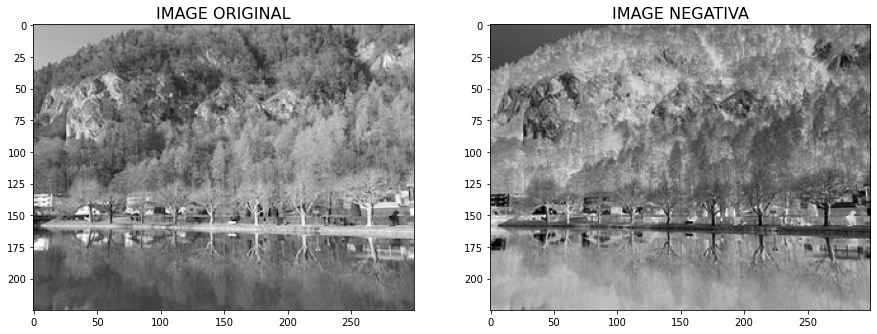

In [19]:
# Transformación NEGATIVA

image_transformation(img, transformation_dict[1])

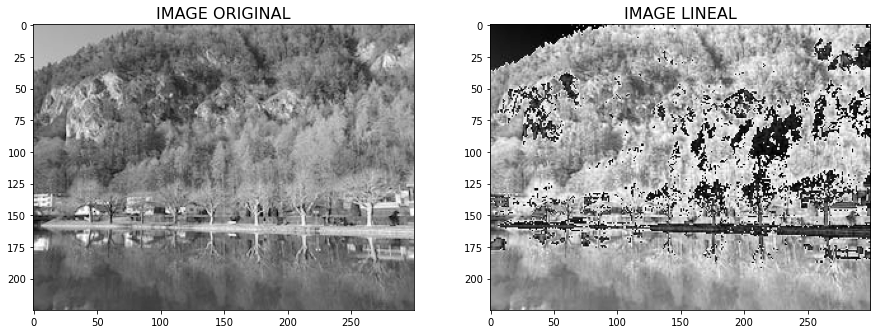

In [20]:
# Transformación LINEAL

image_transformation(img, transformation_dict[2])

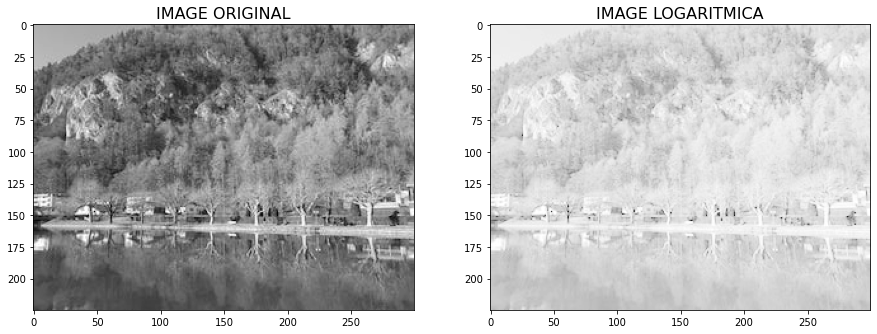

In [21]:
# Transformación LOGARITMICA

image_transformation(img, transformation_dict[3])

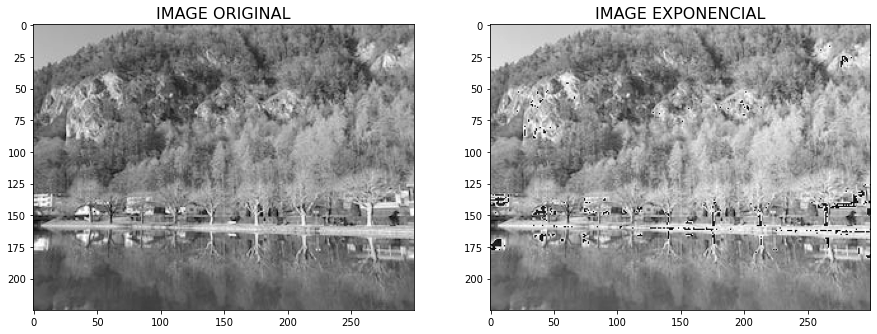

In [22]:
# Transformación EXPONENCIAL

image_transformation(img, transformation_dict[4])

## EJERCICIO 5

### Función con cv2.filter2D

In [23]:
# Función para realizar transformaciones de convolución con diferentes Kernels

def image_convolve(image, kernel):
  images_list = []
  titles = ['ORIGINAL']

  images_list.append(image)
  titles.append('CONVOLVE')

  image_convol = cv2.filter2D(image, -1, kernel)

  images_list.append(image_convol)

  # Desplegar las 2 imagenes
  plt.figure(figsize=(15,15))
  for i in range(len(images_list)):
    plt.subplot(1, len(images_list), i + 1)
    plt.imshow(images_list[i])
    plt.title("IMAGE {}".format(titles[i]), fontdict={"fontsize":16})
  plt.show()

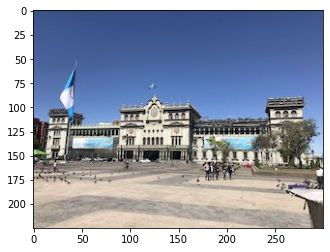

In [24]:
# Cargar y mostrar imagen

img = cv2.imread("IMG_7791.JPG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [25]:
# Kernels

kernel_smallBlur = np.ones((7, 7)) * (1.0 / (7 * 7))

kernel_largeBlur = np.ones((21, 21)) * (1.0 / (21 * 21))

kernel_gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                         [2., 4., 2.],
                                         [1., 2., 1.]])

kernel_sobel_X = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

kernel_sobel_Y = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

kernel_sharp = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])

kernel_laplacian = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])


In [26]:
kernel_dict = {1:kernel_smallBlur,
               2:kernel_largeBlur,
               3:kernel_gaussian,
               4:kernel_sobel_X,
               5:kernel_sobel_Y,
               6:kernel_sharp,
               7:kernel_laplacian}

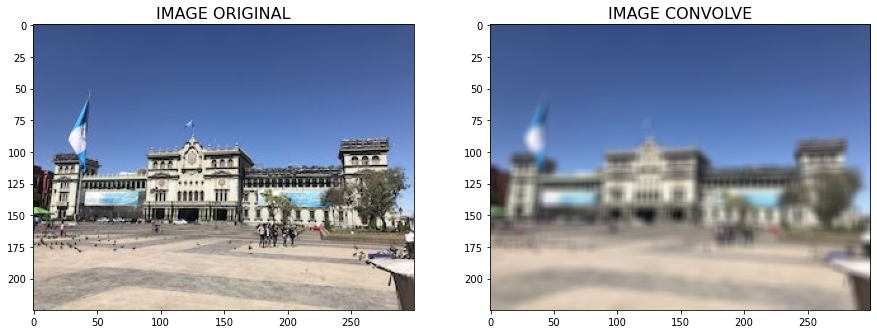

In [27]:
# Convolución con kernel tipo SMALL BLUR

image_convolve(img, kernel_dict[1])

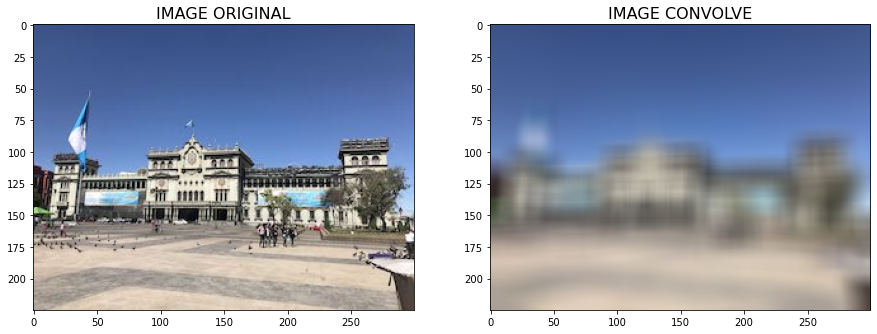

In [28]:
# Convolución con kernel tipo LARGE BLUR

image_convolve(img, kernel_dict[2])

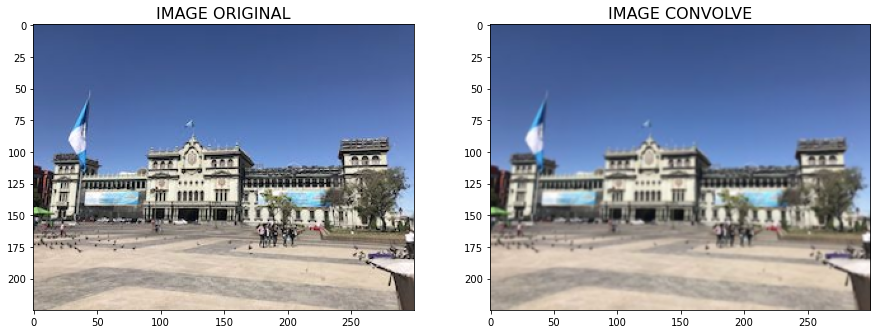

In [29]:
# Convolución con kernel tipo GAUSSIANO

image_convolve(img, kernel_dict[3])

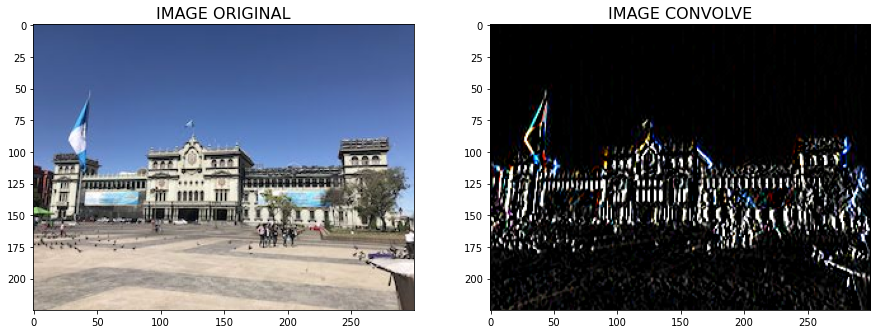

In [30]:
# Convolución con kernel tipo SOBEL en eje X

image_convolve(img, kernel_dict[4])

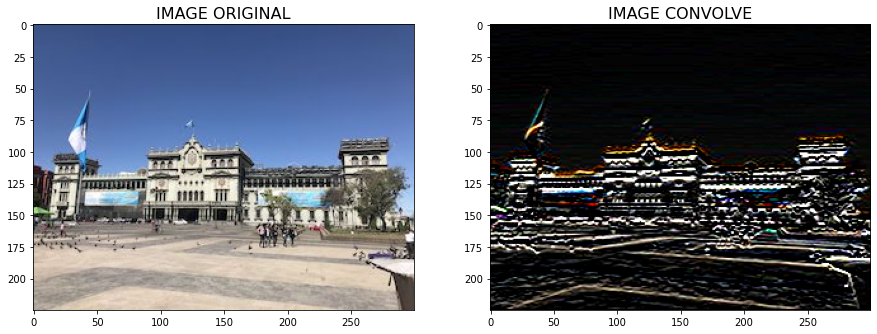

In [31]:
# Convolución con kernel tipo SOBEL en eje Y

image_convolve(img, kernel_dict[5])

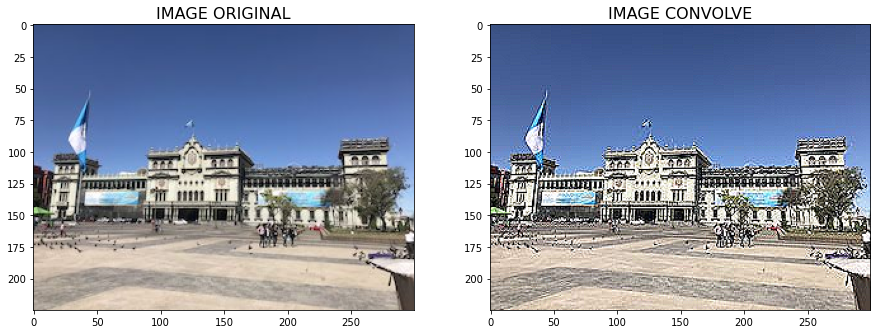

In [32]:
# Convolución con kernel tipo SHARP

image_convolve(img, kernel_dict[6])

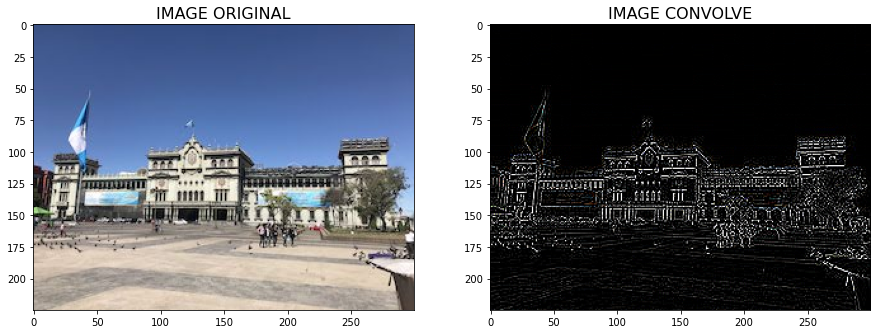

In [33]:
# Convolución con kernel tipo LAPLACIANO

image_convolve(img, kernel_dict[7])

### Funciones definidas en cv2

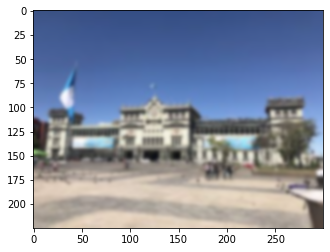

In [34]:
# Kernel GAUSSIANO

ddepth = cv2.CV_16S
ksize = 9
sigmaX = 0

image_convol = cv2.GaussianBlur(img, ksize=(ksize,ksize), sigmaX=sigmaX)
plt.imshow(image_convol)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


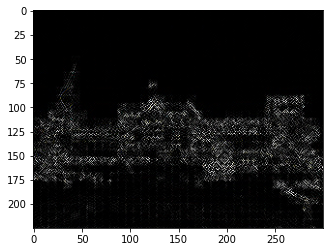

In [35]:
# Kernel SOBEL

ddepth = cv2.CV_16S
ksize = 3
dx = 2
dy = 2

image_convol = cv2.Sobel(img, ddepth=ddepth, dx=dx, dy=dy, ksize=ksize)
plt.imshow(image_convol)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


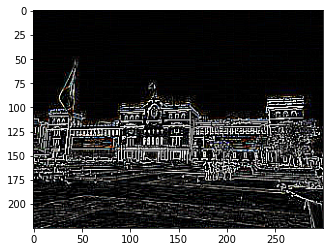

In [36]:
# Kernel LAPLACIANO

ddepth = cv2.CV_16S
ksize = 3

image_convol = cv2.Laplacian(img, ddepth=ddepth, ksize=ksize)
plt.imshow(image_convol)